# Dataset Description

The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features.

The dataset gives us the following insights:

1) Salary

2) Date of joining the company

3) Date of leaving the company

4) Designation oﬀered in the job

5) Location of the job (city)

6) Candidate’s gender

7) Date of birth of candidate

8) Overall marks obtained in grade 10

10) The school board whose curriculum the candidate followed in grade 10

11) Year of graduation - senior year high school

12) Overall marks obtained in grade 12 examinations

13) The school board whose curriculum the candidate followed in grade 12

14) Unique ID identifying the college which the candidate attended

15) Tier of college

16) Degree obtained/pursued by the candidate

17) Specialization pursued by the candidate

18) Aggregate GPA at graduation

19) A unique ID to identify the city in which the college is located in

20) The tier of the city in which the college is located

21) Name of States

22) Year of graduation (Bachelor’s degree)

23) Scores in AMCAT English section

24) Scores in AMCAT Logical section

25) Scores in AMCAT Quantitative section

26) Scores in AMCAT’s domain module

27) Score in AMCAT’s Computer programming section

28) Score in AMCAT’s Electronics & Semiconductor Engineering section
 
29) Score in AMCAT’s Computer Science section

30) Score in AMCAT’s Mechanical Engineering section

31) Score in AMCAT’s Electrical Engineering section

32) Score in AMCAT’s Telecommunication Engineering section

33) Score in AMCAT’s Civil Engineering section











# Objective

The data can be used to make an accurate salary predictor and also to understand what influences salary .



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [4]:
data.shape

(3998, 39)

In [5]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


 <b> Let's drop the first column and make the id column as the index </b>

In [6]:
data.drop(columns=data.columns[0], axis=1, inplace=True)
data.set_index("ID",inplace=True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
data.isin([-1, 'NaN']).sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeablen

<b> We Can Observe 461 Missing Values in JobCity so i will replace it with most frequent value and the same goes for the rest of the columns but we will use mean to fill the fields </b>

In [10]:
data.JobCity.replace(-1,data.JobCity.mode()[0],inplace=True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
data.Domain.replace(-1,data.Domain.mean(),inplace=True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
data.ComputerProgramming.replace(-1, data.ComputerProgramming.mean(), inplace=True)
data.ElectronicsAndSemicon.replace(-1, data.ElectronicsAndSemicon.mean(), inplace=True)
data.ComputerScience.replace(-1, data.ComputerScience.mean(), inplace=True)
data.MechanicalEngg.replace(-1, data.MechanicalEngg.mean(), inplace=True)
data.ElectricalEngg.replace(-1, data.ElectricalEngg.mean(), inplace=True)
data.TelecomEngg.replace(-1, data.TelecomEngg.mean(), inplace=True)
data.CivilEngg.replace(-1, data.CivilEngg.mean(), inplace=True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,90.742371,22.974737,16.478739,31.851176,2.683842,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,90.742371,22.974737,16.478739,31.851176,2.683842,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,90.742371,22.974737,16.478739,31.851176,2.683842,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
data.isin([-1, 'NaN']).sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
d

# Univariate Analysis

Understanding the probability and frequency distribution of each numerical column using hist and dist plots

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


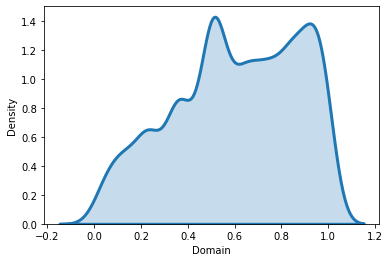

In [31]:
sns.distplot(data['Domain'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Domain');

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

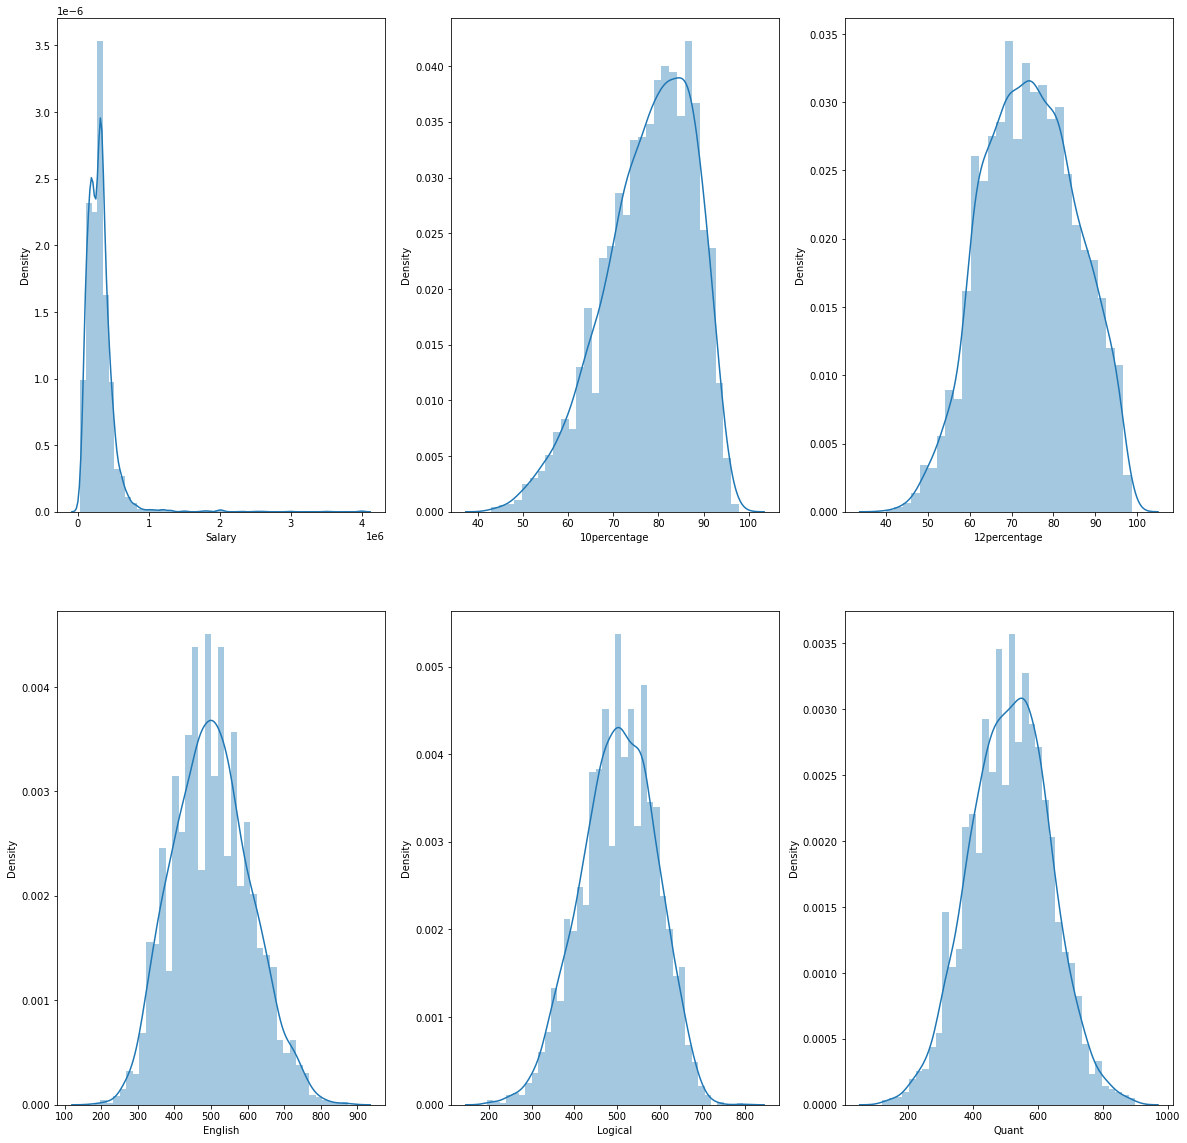

In [29]:
fig1 , axes = plt.subplots(nrows=2,ncols=3 , figsize = (20,20))


sns.distplot( data["Salary"] ,  ax=axes[0, 0])

sns.distplot( data["10percentage"] ,  ax=axes[0, 1])

sns.distplot( data["12percentage"] , ax=axes[0, 2] )

sns.distplot( data["English"], ax=axes[1, 0] )

sns.distplot( data["Logical"] , ax=axes[1, 1] )

sns.distplot( data["Quant"] , ax=axes[1, 2] )



plt.show()

<b> Uneven Distributions Is found in coloumns : 12 percentage and 10 percentage. The english column, logical column, and quant column is normally distributed </b>

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

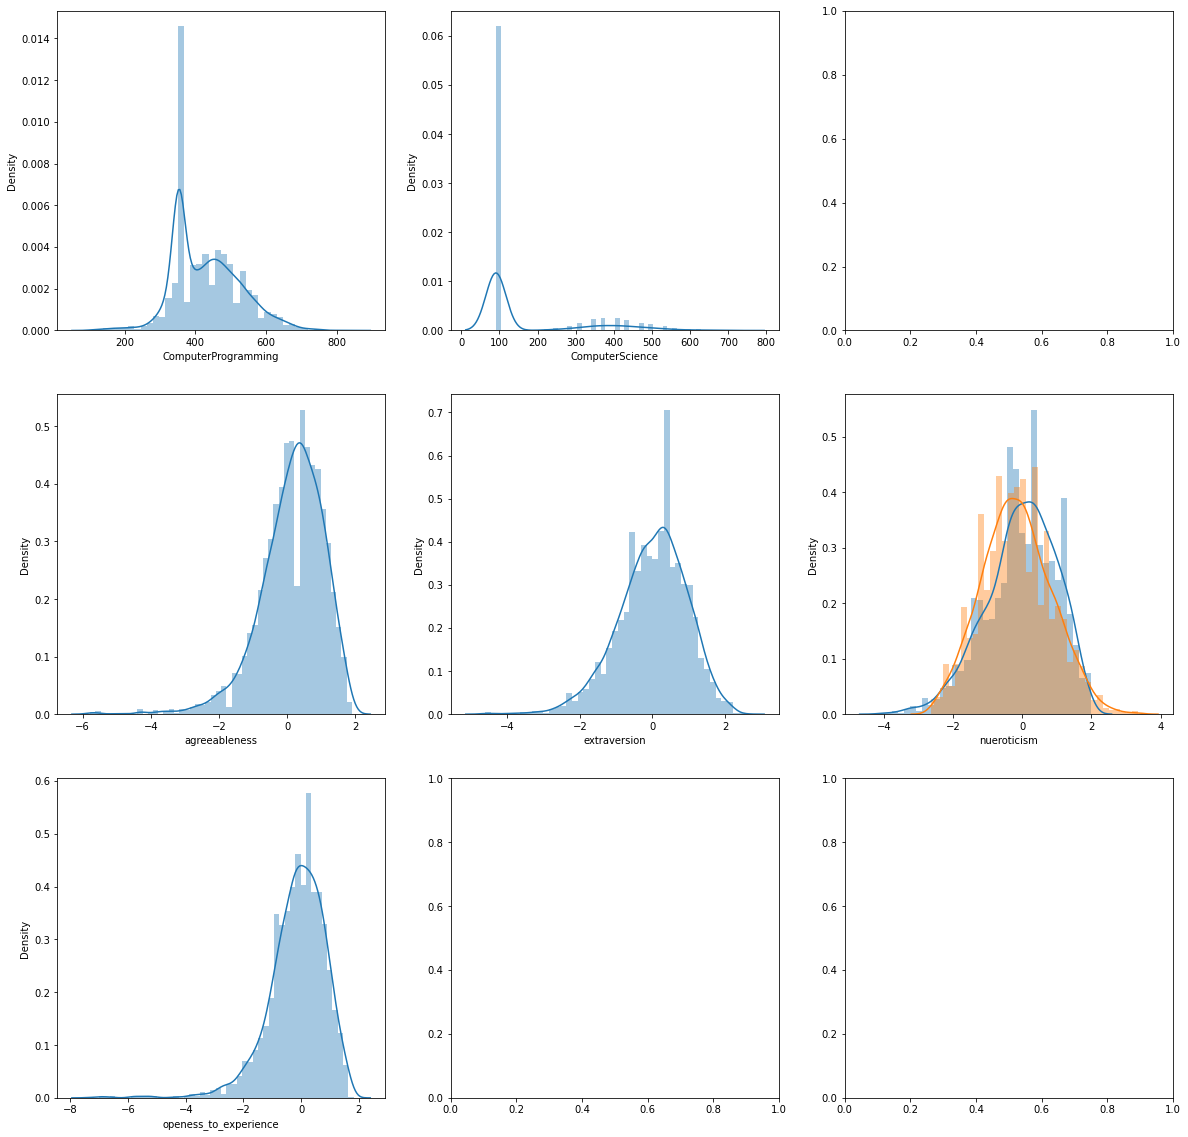

In [33]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))


sns.distplot( data["ComputerProgramming"] ,  ax=axes[0, 0])

sns.distplot( data["ComputerScience"] ,  ax=axes[0, 1])

sns.distplot( data["conscientiousness"] , ax=axes[1, 2] )

sns.distplot( data["agreeableness"], ax=axes[1, 0] )

sns.distplot( data["extraversion"] , ax=axes[1, 1] )

sns.distplot( data["nueroticism"] , ax=axes[1, 2] )

sns.distplot( data["openess_to_experience"] , ax=axes[2, 0])


plt.show()

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


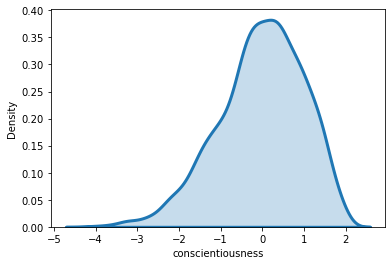

In [35]:
sns.distplot(data['conscientiousness'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'conscientiousness');

<b>We Can Almost find a Normal distribution in each of AMCAT's Modules</b>

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sikha\anaconda3\lib\si

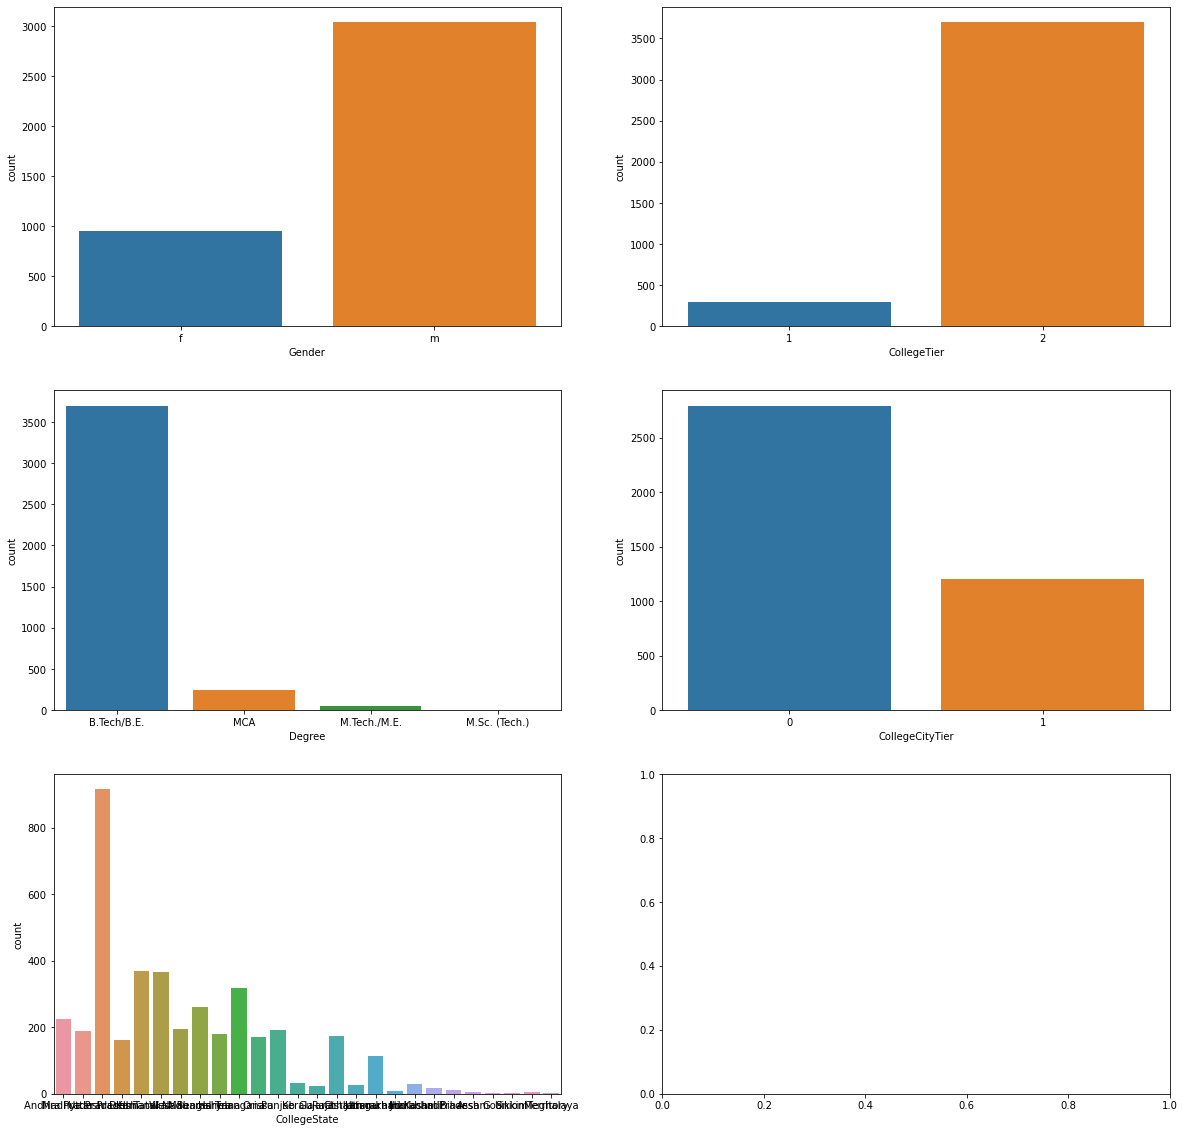

In [41]:
fig1, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.countplot(data['Gender'],ax=axes[0, 0]  )

sns.countplot(data['CollegeTier'],ax=axes[0, 1])

sns.countplot(data['Degree'],ax=axes[1, 0])

sns.countplot(data['CollegeCityTier'],ax=axes[1, 1])

sns.countplot(data['CollegeState'],ax=axes[2, 0])

plt.show()

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


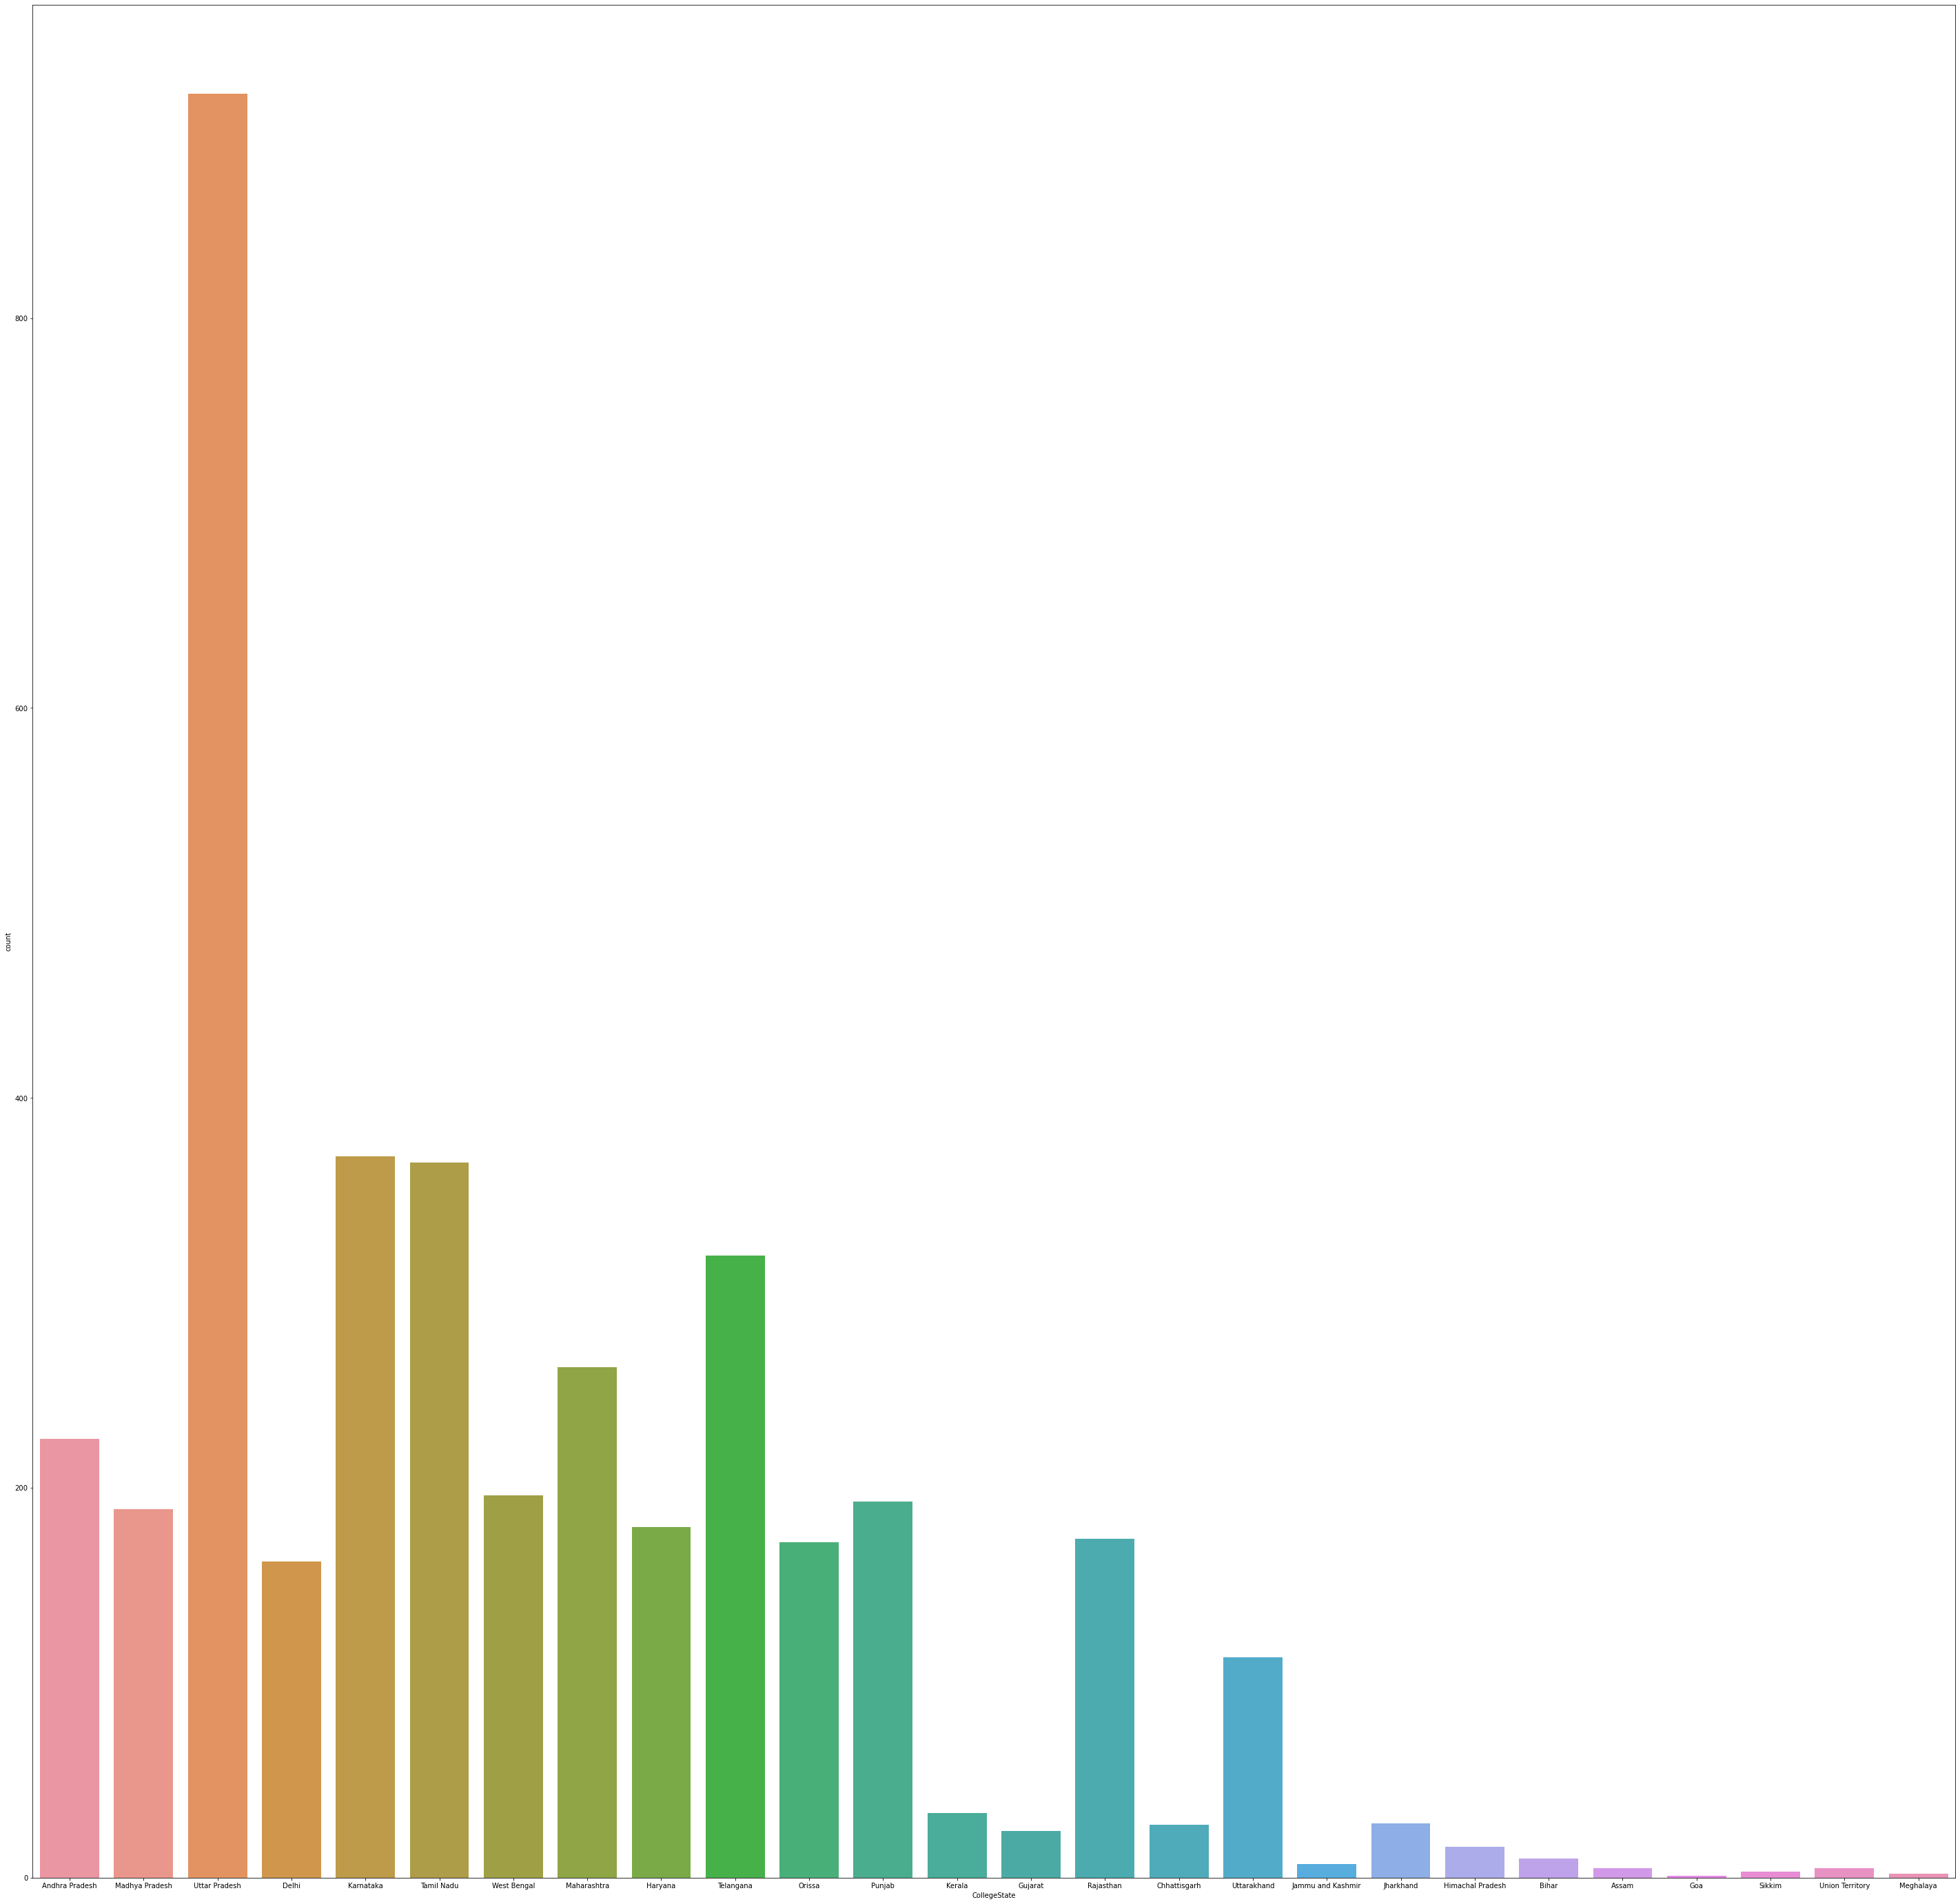

In [45]:
plt.figure(figsize=(50,50))
sns.countplot(data['CollegeState'])
plt.show()

<b> Male are in more in number compared to female

Most of the students have completed their intermediate in State Board
    
Persons who have done Btech in CS has more opportunities to get a job
    

There are more students from Tier-2 College
    

More colleges in UP </b>

# Bivariate Analysis

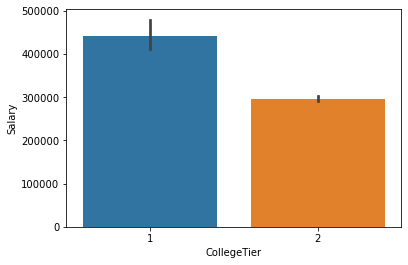

In [48]:
sns.barplot( x=data['CollegeTier'],y=data['Salary']);

<b> Here we can see that Tier-1 College students will have more salary than Tier 2 college students </b>

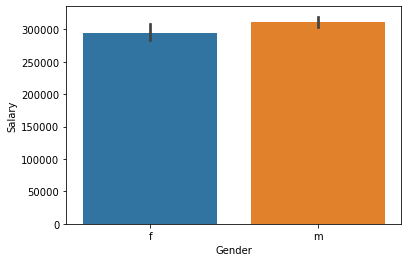

In [50]:
sns.barplot( x=data['Gender'],y=data['Salary']);

<b> male and female have almost similar range in salary </b>

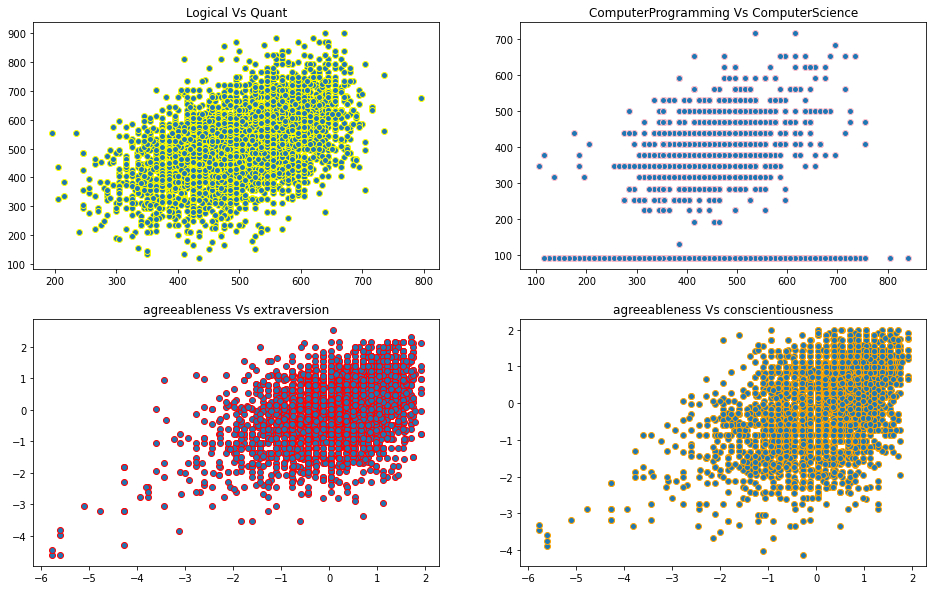

In [52]:
plt.figure(figsize=(16,10))


plt.subplot(2,2,1)
plt.scatter(data['Logical'],data['Quant'], edgecolors='yellow')
plt.title('Logical Vs Quant');


plt.subplot(2,2,2)
plt.scatter(data['ComputerProgramming'],data['ComputerScience'], edgecolors='pink')
plt.title('ComputerProgramming Vs ComputerScience');


plt.subplot(2,2,3)
plt.scatter(data['agreeableness'],data['extraversion'], edgecolors='red')
plt.title('agreeableness Vs extraversion');

plt.subplot(2,2,4)
plt.scatter(data['agreeableness'],data['conscientiousness'], edgecolors='orange')
plt.title('agreeableness Vs conscientiousness');


plt.show()


<b> There is linear realtion between AMCAT's Modules which means students who are good in all modules </b>

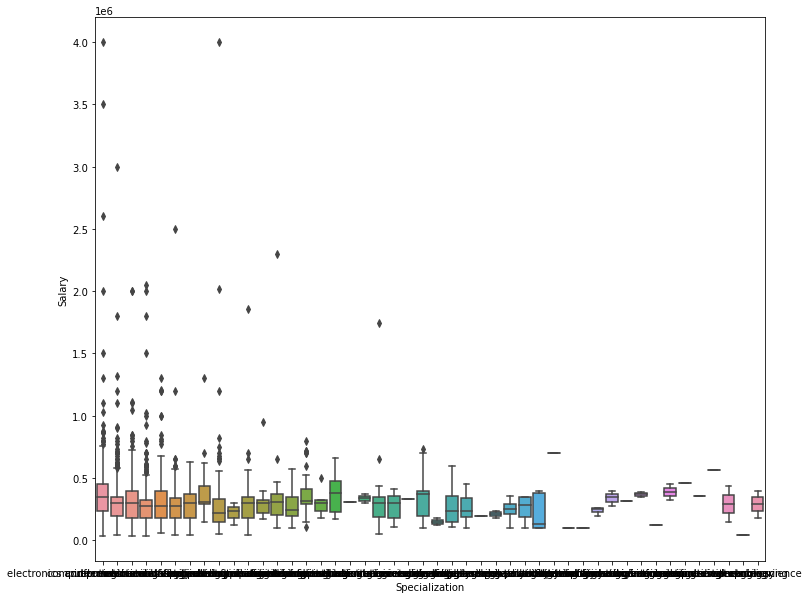

In [54]:
a = sns.boxplot(y = "Salary",
              x = 'Specialization',
              data = data)

a.figure.set_size_inches(12,10)
plt.show()

<b> Gradutes With Specilization in CS has higher chances to get more salary </b>

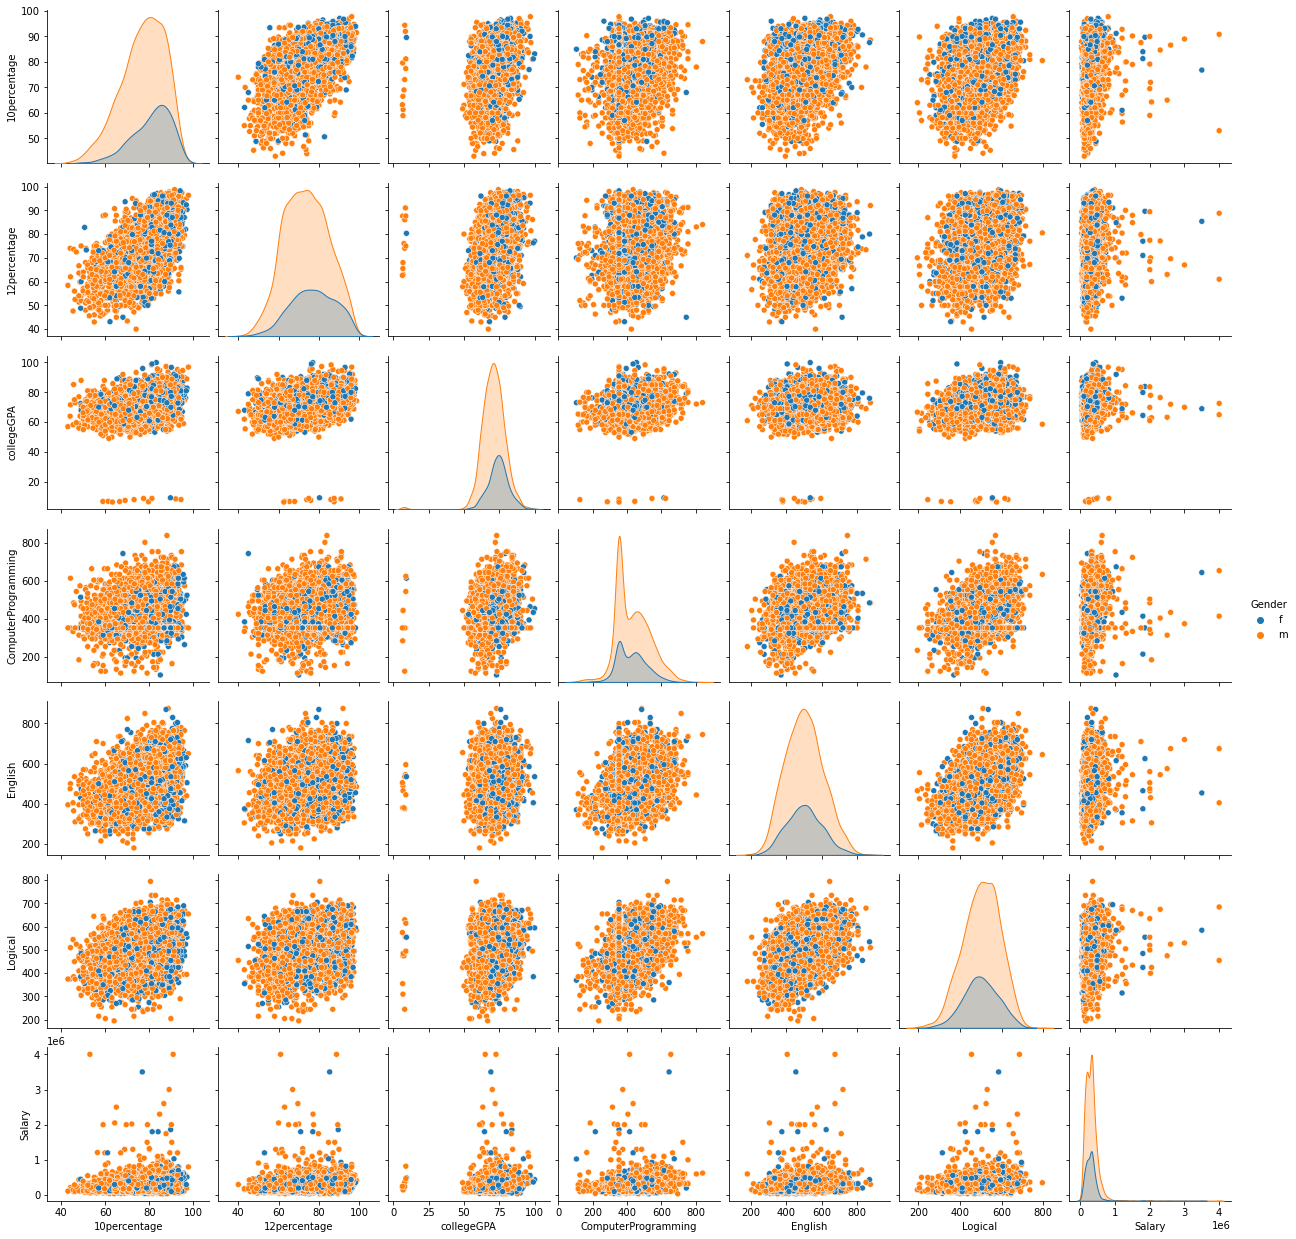

In [61]:

sns.pairplot(data[['Gender','10percentage','12percentage','collegeGPA','ComputerProgramming','English', 'Logical','Salary']],hue='Gender')

<b> the distribution graphs in diagonal form shows us the the distribution of a single variable.
    
In this graph we can see that male have significantly higher rate in almost all the fields becuase of the population is high too </b>


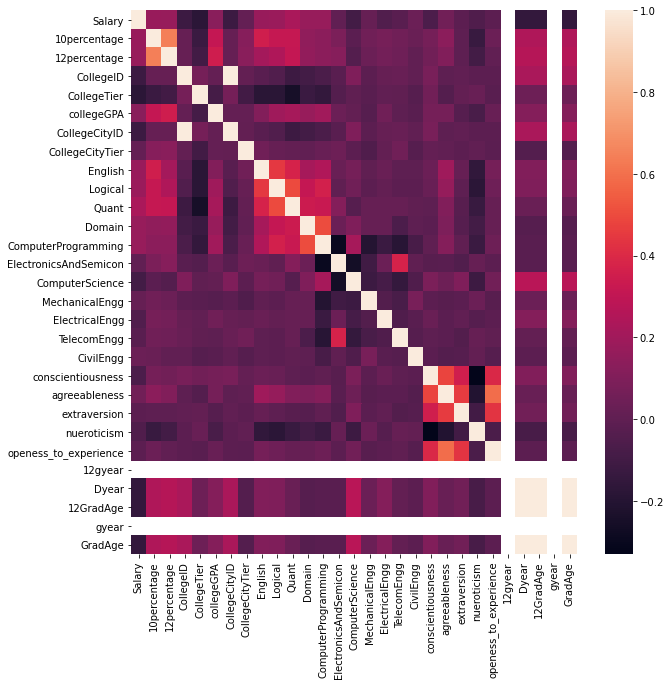

In [63]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr())

plt.show()

# Research Question

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [64]:
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12gyear,Dyear,12GradAge,gyear,GradAge
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",95.8,"board of intermediate education,ap",...,0.9737,0.8128,0.5269,1.35490,-0.4455,1970,1990,20,1970,20
579905,500000,2013-09-01,present,assistant manager,Indore,m,85.4,cbse,85.0,cbse,...,-0.7335,0.3789,1.2396,-0.10760,0.8637,1970,1989,19,1970,19
810601,325000,2014-06-01,present,systems engineer,Chennai,f,85.0,cbse,68.2,cbse,...,0.2718,1.7109,0.1637,-0.86820,0.6721,1970,1992,22,1970,22
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,85.6,cbse,83.6,cbse,...,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1970,1989,19,1970,19
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,78.0,cbse,76.8,cbse,...,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1970,1991,21,1970,21


In [67]:
data['DOJ']=pd.to_datetime(data['DOJ'])
data['DOJyear']=data['DOJ'].dt.year
data['DOJAge']=abs(data['DOJyear']-data['Dyear'])
data.drop(columns=['DOJ'],axis=1,inplace=True)

In [84]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [86]:
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [89]:
df1 = data[['Designation','Specialization','Salary','DOJAge']]

In [92]:
df2 = df1.loc[df1['Specialization'] == 'computer engineering']


In [94]:
list=['engineer','analyst','associate']
df3=df2.loc[df2['Designation'].isin(list)]